In [1]:
import pandas as pd
import glob
import keplerdata
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

In [2]:
ref_dir = '/Users/davies/Projects/TessNinja/Megan/tessninja/data/'
df_megan = pd.read_csv(ref_dir + 'NGC6791_xmatch.csv')
print(df_megan.head(5))
df_guy = pd.read_csv(ref_dir + 'NGC6791_GRD_seismicdata_060318.csv')
print(df_guy.head(5))
df_guy['KIC'] = df_guy.ID
df = pd.merge(df_megan, df_guy, how='outer', on='KIC')
df.to_csv('6791combined.csv')

                     2MASS      KIC             Gaia_DR1         RA  \
0  2MASS J19201973+3746549  2435987  2051291223977890000  290.08221   
1  2MASS J19202354+3751229  2568916  2051291670654710000  290.09811   
2  2MASS J19203005+3750191  2569055  2051297271292000000  290.12521   
3  2MASS J19203485+3746298  2436417  2051288062881990000  290.14523   
4  2MASS J19203934+3748048  2569360  2051294041476490000  290.16394   

         Dec    umag    gmag    rmag    imag    zmag    Jmag    Hmag    Kmag  \
0  37.781940     NaN  15.698  14.517  14.084  13.764  12.512  11.862  11.704   
1  37.856361     NaN  15.156  14.069  13.677  13.405  12.223  11.630  11.497   
2  37.838661  19.243  15.292  14.141  13.746  13.470  12.269  11.651  11.483   
3  37.774971     NaN  15.246  14.078  13.681  13.405  12.233  11.569  11.397   
4  37.801338     NaN  15.391  14.104  13.620  13.299  12.035  11.323  11.164   

   kepmag  pmRA  pmDec  phot_g_mean_mag  
0  14.568   0.0    0.0           14.395  
1  14.12

In [3]:
lc_dir = '/Users/davies/Projects/TessNinja/Megan/tessninja/SeismicData/output/KASOC_Corrected_timeseries/'
for idx, row in df_megan.iterrows():
    lc_file = glob.glob(lc_dir + '*' + str(row.KIC) + '*.dat')
    if len(lc_file) > 0:
        pass
    else:
        print(f'Missing light curve for {row.KIC}')

Missing light curve for 2569624


In [4]:
n = 5
#fig, ax = plt.subplots(n,n, figsize=[12,9])
df.loc[df.KIC == 2568916, 'Numax'] = 0.4
df.loc[df.KIC == 2437171, 'Numax'] = 0.8
df.loc[df.KIC == 2570214, 'Numax'] = 30.0
df.loc[df.KIC == 2438421, 'Numax'] = 0.5
df.loc[df.KIC == 2571093, 'Numax'] = 2.1
'''
for idx, row in tqdm(df.iterrows()):
    lc_file = glob.glob(lc_dir + '*' + str(row.KIC) + '*.dat')
    if len(lc_file) > 0:
        ds = keplerdata.Dataset(row.KIC, lc_file[0])
        ds.power_spectrum()
        x = idx // n
        y = idx % n
        ax[x, y].plot(ds.freq, ds.power)
        ax[x, y].set_xscale('log')
        ax[x, y].set_yscale('log')
        ax[x, y].text(0.1, 0.1, str(row.KIC))
        if row.Numax > 0:
            ax[x, y].axvline(row.Numax, c='r')
'''

"\nfor idx, row in tqdm(df.iterrows()):\n    lc_file = glob.glob(lc_dir + '*' + str(row.KIC) + '*.dat')\n    if len(lc_file) > 0:\n        ds = keplerdata.Dataset(row.KIC, lc_file[0])\n        ds.power_spectrum()\n        x = idx // n\n        y = idx % n\n        ax[x, y].plot(ds.freq, ds.power)\n        ax[x, y].set_xscale('log')\n        ax[x, y].set_yscale('log')\n        ax[x, y].text(0.1, 0.1, str(row.KIC))\n        if row.Numax > 0:\n            ax[x, y].axvline(row.Numax, c='r')\n"

In [5]:
import backfit
newnumax = []
newnumax_err = []
for idx, row in df.iterrows():
    lc_file = glob.glob(lc_dir + '*' + str(row.KIC) + '*.dat')
    nmx, nmx_err = 0,0
    if len(lc_file) > 0:
        ds = keplerdata.Dataset(row.KIC, lc_file[0])
        ds.power_spectrum()
        bf = backfit.Backfit(ds)
        samples, param_names = bf(numax=row.Numax, numax_err=row.Numax*0.1)
        nmx = np.median(samples, axis=0)[-4]
        nmx_err = np.std(samples, axis=0)[-4]
    newnumax = np.append(newnumax, nmx)
    newnumax_err = np.append(newnumax_err, nmx_err)
    print(row.KIC, nmx, nmx_err, row.Numax)
print(newnumax)


2435987 37.87431652553625 0.24231869828948982 36.81361512870068


/Users/davies/Projects/BackFit/backfit/GRDback_likelihood.py:12: RuntimeWarning: invalid value encountered in log
  L = -1.0 * np.sum(np.log(mod) + \
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/emcee/ptsampler.py:340: RuntimeWarning: invalid value encountered in less
  accepts = logrs < logpaccept


2568916 0.3949088558833136 0.040019111152053734 0.4
2569055 30.45958780887376 0.4751339877930003 30.141183702069497
2436417 27.492186892196088 0.2963588361673535 26.531257711810063
2569360 21.4981561683556 0.2092724593061269 20.8334835343876
2297384 30.587723262814457 0.3328926231727964 30.252909830680707
2569624 0 0 nan
2437171 1.007137247458961 0.17598760114394074 0.8
2437353 31.664207332971618 0.35363750831803187 31.105151590757465
2569935 5.456744115847703 0.20880728387913502 6.122419537010452
2569945 30.839563062827587 0.4198291194850247 30.954421069968195
2437496 4.449431694464037 0.10194250455144362 5.6371362842243125
2437507 20.624277441585463 0.18823283969557264 19.728395766537247
2437564 32.3386770178705 0.299447131142518 31.377424219893346
2570214 29.270028410998258 0.3514868008246019 30.0
2437804 26.33974635314686 0.3307166154313309 26.30345873611353
2437816 17.97833292825771 0.14860114869958801 17.082546067554198
2437965 6.856589148763237 0.419771061533945 7.68220999444170

In [6]:
df['numax_fit'] = newnumax
df['numax_fit_err'] = newnumax_err

In [7]:
df.to_csv('6791combined.csv')

68it [00:11,  5.97it/s]


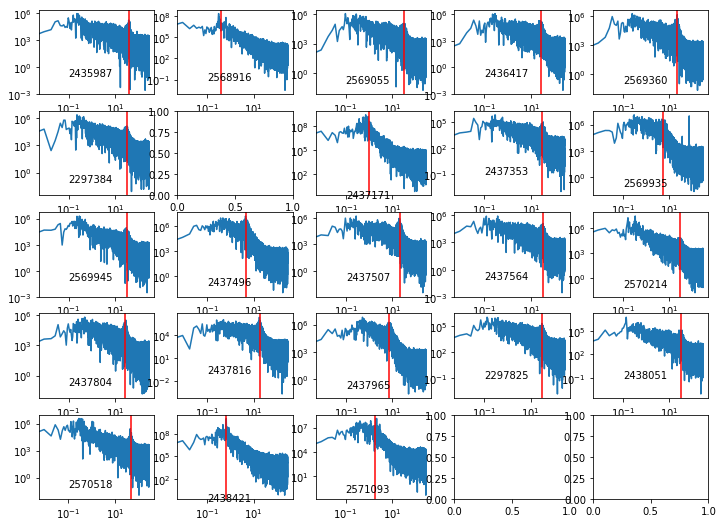

In [8]:
fig, ax = plt.subplots(n,n, figsize=[12,9])

for idx, row in tqdm(df.iterrows()):
    lc_file = glob.glob(lc_dir + '*' + str(row.KIC) + '*.dat')
    if len(lc_file) > 0:
        ds = keplerdata.Dataset(row.KIC, lc_file[0])
        ds.power_spectrum()
        x = idx // n
        y = idx % n
        ax[x, y].plot(ds.freq, ds.power)
        ax[x, y].set_xscale('log')
        ax[x, y].set_yscale('log')
        ax[x, y].text(0.1, 0.1, str(row.KIC))
        if row.numax_fit > 0:
            ax[x, y].axvline(row.numax_fit, c='r')